3. VLF Signal Detection: Very Low Frequency (VLF) signals are often used for underwater
and underground communications. For this problem, two classes of signal spectra from
a low frequency loop transmitter have been collected between 0 and 500 Hz. The figure
below shows a picture of the transmitter along with sample cases of the two different
signal classes.
The input data consists of 1000 signal collections with 101 frequency bins (input features).
The two signal classes are labeled ‘0’ and ‘1’ respectively. The input file is
‘Signal_input_data.csv’ and corresponding class labels are in ‘Signal_class_data.csv’.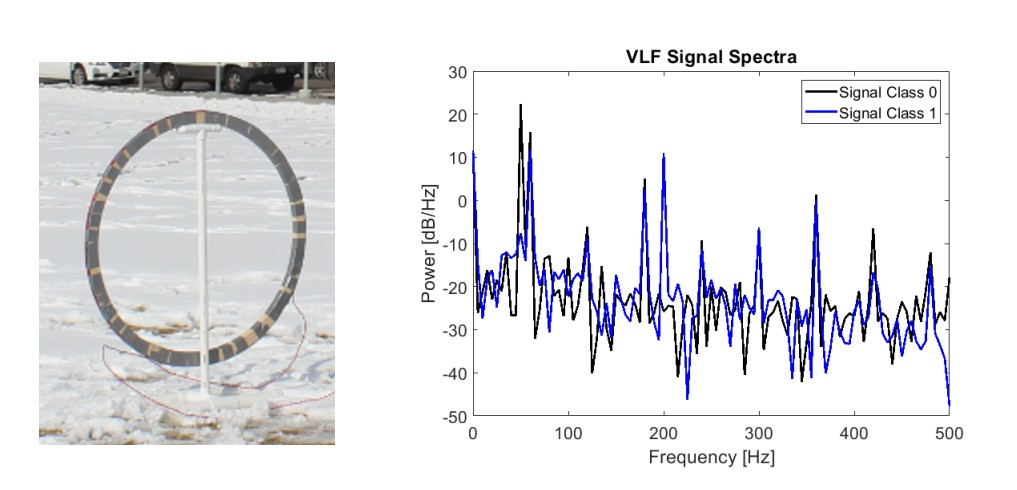

Split the data using an 80-20 split of training to test data. Using the training data, build a
classifier model using:
a) Perceptron
b) Logistic Regression
c) Support Vector Machine with the RBF Kernel
Make sure to note any regularization parameters you use in your models. Run of each of the
above models on the testing data and show a confusion matrix. Which model is the best
option for this dataset?
Hint*: Consider using K-fold CV to find the “best” hyper-parameters.

In [19]:
#importing neccessary python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
#importing neccessary modules from scikit learn
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
X = pd.read_csv("/content/Signal_input_data.csv") #the signal input data has the features
y = pd.read_csv("/content/Signal_class_data.csv").values.ravel() #the signal class data is the target column

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #splitting data into 80(train)-20(test)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
# Defining function for training models and plotting confusion matrix
def train_and_evaluate(model, param_grid, model_name):
    grid = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    return best_model

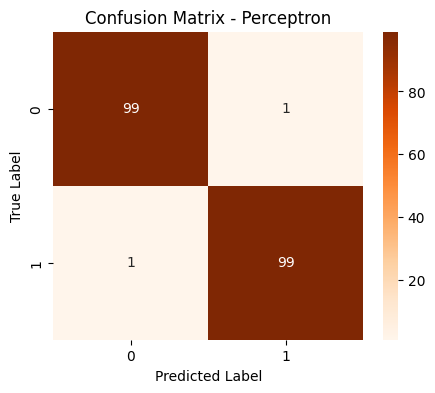

Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [25]:
# Training Perceptron
perceptron_params = {'alpha': [0.0001, 0.001, 0.01, 0.1]}
best_perceptron = train_and_evaluate(Perceptron(max_iter=1000, random_state=42), perceptron_params, "Perceptron")

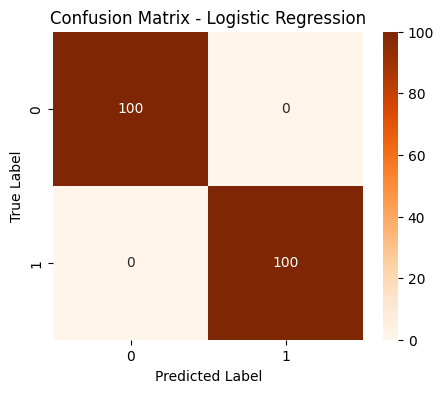

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [26]:
# Training Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
best_log_reg = train_and_evaluate(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, "Logistic Regression")

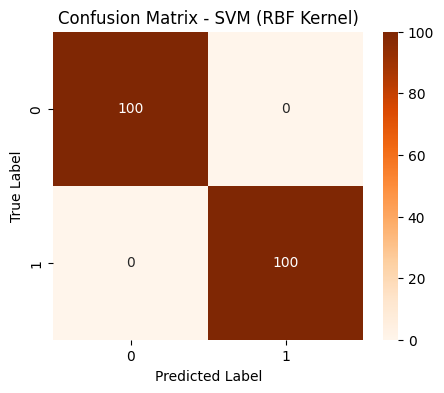

SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [27]:
# Training SVM with RBF Kernel
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
best_svm = train_and_evaluate(SVC(kernel='rbf', random_state=42), svm_params, "SVM (RBF Kernel)")

The best model for this dataset is Logistic Regression. Both logistic regression and SVM(RBF Kernel) have 100% accuracy and as non-linearity is not expected, Logistic regression is more simple and easy to interpret.